<a href="https://colab.research.google.com/github/wiiiiish/2022-machine_learning/blob/main/%08%EB%AA%A8%EB%8D%B8_%EC%A0%95%ED%99%95%EB%8F%84_%ED%99%95%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

drive  sample_data


In [2]:
%cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
%cd ../2022-05-12\ lstm

/content/drive/MyDrive/Colab Notebooks/2022-05-12 lstm


In [10]:
%cd ../2022-05-11\ 선형회귀모델

/content/drive/MyDrive/Colab Notebooks/2022-05-11 선형회귀모델


In [8]:
from keras.models import load_model
model_lstm = load_model('./lstm_model.h5')
model_rnn = load_model('./rnn_model.h5')

In [11]:
import pickle
with open('LinearRegression_s_pred_model.pickle', 'rb') as f:
    model_linear = pickle.load(f)

In [13]:
!unzip ./data/data.zip -d ./data

Archive:  ./data/data.zip
replace ./data/y_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./data/y_train.csv      
replace ./data/y_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./data/y_test.csv       
replace ./data/X_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./data/X_test.csv       
replace ./data/X_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./data/X_train.csv      


In [24]:
test_X = pd.read_csv('./data/X_test.csv', encoding='utf-8')
test_y = pd.read_csv('./data/y_test.csv', encoding='utf-8')
train_X = pd.read_csv('./data/X_train.csv', encoding='utf-8')
train_y = pd.read_csv('./data/y_train.csv', encoding='utf-8')

In [25]:
test_X = test_X.drop([test_X.columns[0], test_X.columns[1]], axis=1)
test_X

,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,now_aod,before_hour_aod
0,23.491114,0.0,1.350743,92.967544,0.0,5.941786,1166.524671,25.372017,0.0,0.0
1,23.551742,0.0,1.380648,93.830948,0.0,6.086599,1109.720781,25.303795,0.0,0.0
2,23.576351,0.0,1.402363,93.879005,0.0,5.981344,1192.956846,25.384583,0.0,0.0
3,23.543496,0.0,1.340201,93.768065,0.0,6.014781,1013.211345,25.387069,0.0,0.0
4,23.578195,0.0,1.327544,93.323532,0.0,6.043455,999.245202,25.346004,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17276,22.987026,0.0,1.270800,87.701487,0.0,0.000000,1999.144895,23.222113,0.0,0.0
17277,22.992241,0.0,1.232895,85.640214,0.0,0.000000,1993.311715,23.285968,0.0,0.0
17278,23.027955,0.0,1.199671,85.843697,0.0,0.000000,1968.023262,23.310284,0.0,0.0
17279,23.050437,0.0,0.993860,87.057542,0.0,0.000000,1990.279171,23.289812,0.0,0.0


In [26]:
test_y = test_y.drop(test_y.columns[0], axis=1)
test_y

,aod
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
17276,0.0
17277,0.0
17278,0.0
17279,0.0


In [27]:
X_test = np.array(test_X)
y_test = np.array(test_y)

In [28]:
model_linear.score(X_test,y_test)

0.8949905246794347

In [29]:
X = test_X.loc[:, 'temperature':]
X

,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,now_aod,before_hour_aod
0,23.491114,0.0,1.350743,92.967544,0.0,5.941786,1166.524671,25.372017,0.0,0.0
1,23.551742,0.0,1.380648,93.830948,0.0,6.086599,1109.720781,25.303795,0.0,0.0
2,23.576351,0.0,1.402363,93.879005,0.0,5.981344,1192.956846,25.384583,0.0,0.0
3,23.543496,0.0,1.340201,93.768065,0.0,6.014781,1013.211345,25.387069,0.0,0.0
4,23.578195,0.0,1.327544,93.323532,0.0,6.043455,999.245202,25.346004,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17276,22.987026,0.0,1.270800,87.701487,0.0,0.000000,1999.144895,23.222113,0.0,0.0
17277,22.992241,0.0,1.232895,85.640214,0.0,0.000000,1993.311715,23.285968,0.0,0.0
17278,23.027955,0.0,1.199671,85.843697,0.0,0.000000,1968.023262,23.310284,0.0,0.0
17279,23.050437,0.0,0.993860,87.057542,0.0,0.000000,1990.279171,23.289812,0.0,0.0


In [30]:
X = np.array(X)
X

array([[23.4911141 ,  0.        ,  1.3507426 , ..., 25.37201717,
         0.        ,  0.        ],
       [23.55174195,  0.        ,  1.38064794, ..., 25.30379528,
         0.        ,  0.        ],
       [23.57635055,  0.        ,  1.40236331, ..., 25.38458342,
         0.        ,  0.        ],
       ...,
       [23.02795509,  0.        ,  1.19967132, ..., 23.3102835 ,
         0.        ,  0.        ],
       [23.05043681,  0.        ,  0.99386042, ..., 23.28981171,
         0.        ,  0.        ],
       [22.58572819,  0.        ,  0.97115495, ..., 22.54947011,
         0.        ,  0.        ]])

In [31]:
X.shape

(17281, 10)

In [33]:
temp = []
for i in range(len(X)-360):
  for j in range(360):
    temp.append(X[i+j])
test_data = np.array(temp)
test_data.shape

(6091560, 10)

In [34]:
X_test2 = test_data.reshape(16921,360,10)
X_test2.shape

(16921, 360, 10)

In [35]:
y = test_y.iloc[360:, :]
y

,aod
360,0.0
361,0.0
362,0.0
363,0.0
364,0.0
...,...
17276,0.0
17277,0.0
17278,0.0
17279,0.0


In [36]:
y_test2 = np.array(y)
print(y_test2.shape)
y_test2

(16921, 1)


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [38]:
rnn_res = model_rnn.predict(X_test2)
rnn_res

array([[-0.01425314],
       [-0.03751516],
       [-0.02998114],
       ...,
       [-0.03065634],
       [-0.03003836],
       [-0.03034735]], dtype=float32)

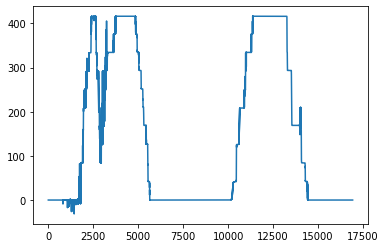

In [39]:
plt.plot(rnn_res)

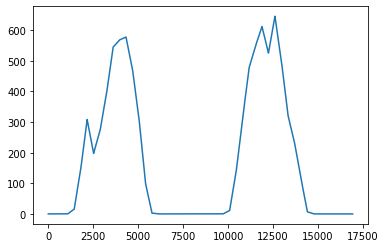

In [40]:
plt.plot(y_test2)

In [41]:
lstm_res = model_lstm.predict(X_test2)
lstm_res

array([[ 0.05406952],
       [-0.01578903],
       [ 0.04593277],
       ...,
       [ 0.3223648 ],
       [ 0.32365608],
       [ 0.31337833]], dtype=float32)

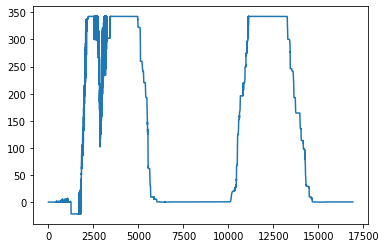

In [42]:
plt.plot(lstm_res)

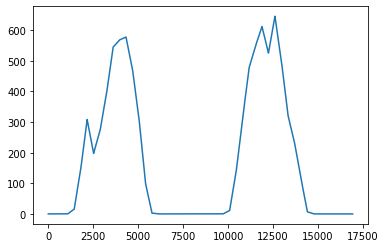

In [43]:
plt.plot(y_test2)

In [44]:
linear_res = model_linear.predict(X_test)
linear_res

array([[ 20.52413752],
       [ 22.76747883],
       [ 23.08488613],
       ...,
       [-11.25200112],
       [-11.59604222],
       [ -5.41353383]])

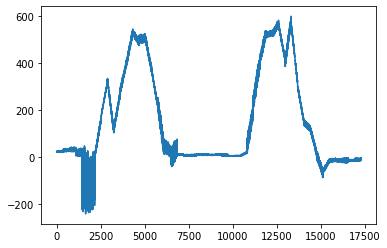

In [45]:
plt.plot(linear_res)

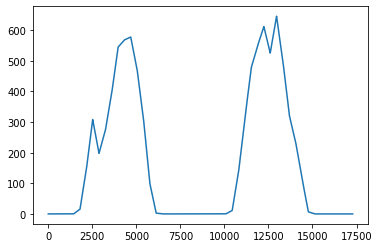

In [46]:
plt.plot(y_test)